# Install libraries

## Sewar: for image quality assessment.

This code block installs the `sewar` library, which is used for image quality assessment.

In [ ]:
!pip install sewar

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.6-py3-none-any.whl size=11421 sha256=2e2418ed58cc22b1c369faf4faa93d0fc61505c0c3d44186cd6fc3f735fa5f0c
  Stored in directory: /root/.cache/pip/wheels/87/f9/d9/6ec7e7b470df5ba0e317c6988ba7677a124ab220f5effea702
Successfully built sewar


# import required libraries

This code block imports all the necessary libraries for image processing, analysis, and visualization.

In [ ]:
import sys
# set_printoptions(threshold=sys.maxsize)
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
from matplotlib import pyplot as plt
import os
import numpy as np
import random
import pandas as pd
from skimage import io

# Download Images
This code block downloads three images (`lake.jpg`, `peppers.jpg`, and `mandril.jpg`) from the provided URLs using the `wget` command. These images will be used as input for the image processing tasks.

In [ ]:
!wget https://i.ibb.co/GxhRPnC/lake-512.jpg -O lake.jpg
!wget https://i.ibb.co/D18bYP1/peppers-color.jpg -O peppers.jpg
!wget https://i.ibb.co/2dckpJ9/mandril-color.jpg -O mandril.jpg
#!wget https://i.ibb.co/2StQxJm/bw.jpg -O bw.jpg

--2025-02-24 06:47:17--  https://i.ibb.co/GxhRPnC/lake-512.jpg
Resolving i.ibb.co (i.ibb.co)... 108.181.22.211
Connecting to i.ibb.co (i.ibb.co)|108.181.22.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169146 (165K) [image/jpeg]
Saving to: ‘lake.jpg’

lake.jpg            100%[===================>] 165.18K   364KB/s    in 0.5s    

2025-02-24 06:47:50 (364 KB/s) - ‘lake.jpg’ saved [169146/169146]

--2025-02-24 06:47:50--  https://i.ibb.co/D18bYP1/peppers-color.jpg
Resolving i.ibb.co (i.ibb.co)... 108.181.22.211
Connecting to i.ibb.co (i.ibb.co)|108.181.22.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144729 (141K) [image/jpeg]
Saving to: ‘peppers.jpg’

peppers.jpg         100%[===================>] 141.34K   369KB/s    in 0.4s    

2025-02-24 06:47:51 (369 KB/s) - ‘peppers.jpg’ saved [144729/144729]

--2025-02-24 06:47:51--  https://i.ibb.co/2dckpJ9/mandril-color.jpg
Resolving i.ibb.co (i.ibb.co)... 108.181.22.211
Connectin

This code block contains commented-out code that appears to be related to reading and displaying a black and white image (`bw.jpg`) and checking its shape.

In [ ]:
# bw = cv2.imread('bw.jpg')
# print(bw.shape)
# cv2_imshow(bw)

This code block contains commented-out code to print the content of the `bw` image variable.

In [ ]:
# print(bw)

This code block contains commented-out code for applying a binary threshold to the `bw` image and displaying the result.

In [ ]:
# ret, thresh = cv2.threshold(bw,70,255,0)
# cv2_imshow(thresh)

This is an empty code cell.

This code block contains commented-out code to print the content of the `thresh` image variable.

In [ ]:
# print(thresh)

# Function for getting alpha and beta value

## Returns alpha and beta value

This function `convert` takes a Hadamard matrix `H` and an initial state `i_state` and performs a quantum-inspired conversion. It calculates a covariance, scales it, and returns a list containing the squared components of the resulting state vector, scaled by 255.

In [ ]:
def convert (H,i_state):
    cov = np.dot(H,i_state)
    si = cov * (1/np.sqrt (2))
    alpha=si[0][0]
    beta=si[1][0]
    #c = si[0][0] + si[1][0] # a=1/sqrt(2)(b+c)
    #c = (alpha*alpha)+(beta*beta)
    # m=max(alpha, beta) # measurement after largest probability value
    # c=m*m
    #print(alpha,beta)
    return [beta,alpha]

# New Functions for measurement

## Convert_a : returns 0 or 255

## Convert_b : returns 0 or 1

This code block defines two functions, `convert_a` and `convert_b`, which also perform a quantum-inspired conversion using a Hadamard matrix. They differ in how the final value `c` is determined based on a random choice weighted by the squared components of the state vector.

When results of these measurements are averaged out over multiple measurements we get back the almost near original pixel value

In [ ]:
def convert_a(H,i_state):
    cov = np.dot(H,i_state)
    si = cov * (1/np.sqrt (2))
    alpha=si[0][0]
    beta=si[1][0]
    #c = si[0][0] + si[1][0] # a=1/sqrt(2)(b+c)
    #c = (alpha*alpha)+(beta*beta)
    #m=min(alpha, beta) # measurement after largest probability value
    #c=m*m
    t=[alpha , beta]
    e=random.choices(t,weights=[alpha**2,beta**2],k=1)
    if e[0] == alpha:
      c = 1*255
    else:
      c = 0*255
    #c=e*e
    return c

def convert_b(H,i_state):
    cov = np.dot(H,i_state)
    si = cov * (1/np.sqrt (2))
    alpha=si[0][0]
    beta=si[1][0]
    #c = si[0][0] + si[1][0] # a=1/sqrt(2)(b+c)
    #c = (alpha*alpha)+(beta*beta)
    #m=min(alpha, beta) # measurement after largest probability value
    #c=m*m
    t=[alpha , beta]
    e=random.choices(t,weights=[alpha**2,beta**2],k=1)
    if e[0] == alpha:
      c = 0
    else:
      c = 1
    #c=e*e
    return c

# conv img and rgb to get alpha and beta values

# Get alpha and beta component of passed pixel value
This code block defines two functions:
- `conv_img`: Converts a grayscale image using a Hadamard transform-inspired approach. It resizes the image (commented out), converts it to grayscale, applies a Hadamard transformation to each pixel's intensity values, and stores the resulting components in a new image. It also calculates and prints the mean and variance of the squared magnitudes of the resulting state vectors.
- `conv_rgb`: Converts a color image by applying the `conv_img` function to each color channel (blue, green, red) and then combining the results into a new color image.

In [ ]:
def conv_img(img):
    #small = cv2.resize(img,(256,256))
    small = img
    small = cv2.cvtColor(small, cv2.COLOR_BGRA2BGR)
    small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)
    small = cv2.cvtColor(small, cv2.COLOR_RGB2GRAY)
    #cv2_imshow(small)
    H = np.array([[1,1],[1,-1]])
    converted = np.zeros((256,512))
    img = small
    list_st=[]
    for i in range(0,len(img)) :
      for j in range(0,len(img[0])):
        a = img[i][j]
        a1= np.sqrt(a/255)
        #a1= a/255
        b= 255 - a
        a2 = np.sqrt(b/255)
        #a2 = b/255
        i_state= np.array([[a2],[a1]])
        # print(si)
        c = convert(H,i_state)
        #c = c / sqrt(2)
        list_st+=[c[0]**2 + c[1]**2]
        converted [i][2*j] = c[0]*255
        converted [i][2*j+1] = c[1]*255
    list_st = np.array(list_st)
    print(np.mean(list_st),"+-",np.var(list_st))

    return converted

def conv_rgb(img):
    #img = cv2.imread(fname)
    b, g, r    = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    b1, g1, r1 = conv_img(b), conv_img(g), conv_img(r)
    img = cv2.resize(img,(512,256))
    img[:,:,0], img[:,:,1], img[:,:,2] = b1, g1, r1
    return img

# Conv function to convert given pixel to its alpha and beta components and then perform measurement

## conv_img1 and conv_img6 are same

This code block defines several functions for image conversion, likely related to quantum-inspired image processing:
- `conv_img1`: Converts a grayscale image with resizing and applies a Hadamard transform-inspired conversion, returning a grayscale image.
- `conv_img6`: Similar to `conv_img1`, converts a grayscale image with resizing and applies a Hadamard transform-inspired conversion, returning a grayscale image.
- `conv1_rgb`: Converts a color image by applying `conv_img1` to each color channel and combining the results.
- `conv6_rgb`: Converts a color image by applying `conv_img6` to each color channel and combining the results.

In [ ]:
def conv_img1(img):
    small = cv2.resize(img,(256,256))
    #small = cv2.cvtColor(small, cv2.COLOR_BGRA2BGR)
    #small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)
    #small = cv2.cvtColor(small, cv2.COLOR_RGB2GRAY)
    #cv2_imshow(small)
    H = np.array([[1,1],[1,-1]])
    converted = np.zeros((256,256))
    img = small
    for i in range(0,len(img)) :
      for j in range(0,len(img[0])):
        a = img[i][j]
        a1= np.sqrt(a/255)
        #a1= a/255
        b= 255 - a
        a2 = np.sqrt(b/255)
        #a2 = b/255
        i_state= np.array([[a2],[a1]])
        # print(si)
        c = convert_a(H,i_state)
        #c = c / sqrt(2)
        converted [i][j] = c

    return converted


def conv_img6(img):
    small = cv2.resize(img,(256,256))
    #small = cv2.cvtColor(small, cv2.COLOR_BGRA2BGR)
    #small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)
    #small = cv2.cvtColor(small, cv2.COLOR_RGB2GRAY)
    #cv2_imshow(small)
    H = np.array([[1,1],[1,-1]])
    converted = np.zeros((256,256))
    img = small
    for i in range(0,len(img)) :
      for j in range(0,len(img[0])):
        a = img[i][j]
        a1= np.sqrt(a/255)
        #a1= a/255
        b= 255 - a
        a2 = np.sqrt(b/255)
        #a2 = b/255
        i_state= np.array([[a2],[a1]])
        # print(si)
        c = convert_a(H,i_state)
        #c = c / sqrt(2)
        converted [i][j] = c

    return converted

def conv1_rgb(img):
    #img = cv2.imread(fname)
    img = cv2.resize(img,(256,256))
    b, g, r    = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    b1, g1, r1 = conv_img1(b), conv_img1(g), conv_img1(r)
    img[:,:,0], img[:,:,1], img[:,:,2] = b1, g1, r1
    return img

def conv6_rgb(img):
    #img = cv2.imread(fname)
    img = cv2.resize(img,(256,256))
    b, g, r    = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    b1, g1, r1 = conv_img6(b), conv_img6(g), conv_img6(r)
    img[:,:,0], img[:,:,1], img[:,:,2] = b1, g1, r1
    return img

# Other conv logics

## conv_img_01 uses the convert function to return the intermediate superposition visualization with alpha beta value seperated

## conv_img__01_ab converts each pixel into ints binary then applies measurement on each of the bits of the binary value

This code block defines several functions for image conversion, focusing on binary or near-binary image transformations:
- `conv_img_01`: Converts a grayscale image based on whether pixel values are 0 or not, applying a Hadamard transform-inspired conversion and returning a grayscale image. It also calculates and prints the mean and variance of squared magnitudes.
- `conv_img_01_ab`: Converts a grayscale image by processing each pixel's binary representation. For each bit, it applies a Hadamard transform-inspired conversion using `convert_b` and reconstructs a new pixel value from the results.
- `conv7_rgb`: Converts a color image by applying `conv_img_01_ab` to each color channel and combining the results.
- `conv8_rgb`: Similar to `conv7_rgb`, converts a color image by applying `conv_img_01_ab` to each color channel and combining the results.
It also contains commented-out code demonstrating the usage of `conv_img_01` on a thresholded image.

In [ ]:
def conv_img_01(img):
    #small = cv2.resize(img,(256,256))
    small = img
    #small = cv2.cvtColor(small, cv2.COLOR_BGRA2BGR)
    #small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)
    #small = cv2.cvtColor(small, cv2.COLOR_RGB2GRAY)
    #cv2_imshow(small)
    H = np.array([[1,1],[1,-1]])
    converted = np.zeros((32,64))
    img = small
    list_st=[]
    for i in range(0,len(img)) :
      for j in range(0,len(img[0])):
        a = img[i][j]
        #a2 = b/255
        if a == 0:
            i_state= np.array([[1],[0]])
        else:
            i_state= np.array([[0],[1]])
        # print(si)
        c = convert(H,i_state)
        #c = c / sqrt(2)
        list_st+=[c[0]**2 + c[1]**2]
        converted [i][2*j] = c[0]*255
        converted [i][2*j+1] = c[1]*255
    list_st = np.array(list_st)
    print(np.mean(list_st),"+-",np.var(list_st))

    return converted

def conv_img_01_ab(img):
    #small = cv2.resize(img,(256,256))
    small = img
    #small = cv2.cvtColor(small, cv2.COLOR_BGRA2BGR)
    #small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)
    #small = cv2.cvtColor(small, cv2.COLOR_RGB2GRAY)
    #cv2_imshow(small)
    H = np.array([[1,1],[1,-1]])
    converted = np.zeros((256,256))
    list_st=[]
    for i in range(0,len(img)) :
      for j in range(0,len(img[0])):
        a = img[i][j]
        lst = []
        measure = []
        lst = list(np.binary_repr(img[i][j] ,width=8))
        #a2 = b/255
        for element in lst:
          if element == "0":
              i_state= np.array([[1],[0]])
          else:
              i_state= np.array([[0],[1]])
          # print(si)
          c = convert_b(H,i_state)
          measure += [str(c)]
        #c = c / sqrt(2)
        #print(lst,measure)
        converted [i][j] = int(''.join(measure), 2)
    #list_st = np.array(list_st)
    #print(np.mean(list_st),"+-",np.var(list_st))

    return converted



def conv7_rgb(img):
    #img = cv2.imread(fname)
    img = cv2.resize(img,(256,256))
    b, g, r    = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    b1, g1, r1 = conv_img_01_ab(b), conv_img_01_ab(g), conv_img_01_ab(r)
    img[:,:,0], img[:,:,1], img[:,:,2] = b1, g1, r1
    return img


def conv8_rgb(img):
    #img = cv2.imread(fname)
    img = cv2.resize(img,(256,256))
    b, g, r    = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    b1, g1, r1 = conv_img_01_ab(b), conv_img_01_ab(g), conv_img_01_ab(r)
    img[:,:,0], img[:,:,1], img[:,:,2] = b1, g1, r1
    return img

# gray = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
# conv_im = conv_img_01(gray)
# print(conv_im)

# Convert images to grayscale and display then apply conv_img_01 to get intermidiate superposition
This code block loads three images (`lake.jpg`, `peppers.jpg`, and `mandril.jpg`), resizes them, converts them to grayscale, and then back to color (likely for compatibility with later functions expecting 3 channels). It then applies a binary threshold to each image, converts the thresholded images to grayscale, and finally applies the `conv_img_01` function to each grayscale thresholded image. The thresholded images are then displayed.

0.9999999999999999 +- 1.232595164407831e-32
0.9999999999999999 +- 1.232595164407831e-32
0.9999999999999999 +- 1.232595164407831e-32


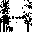

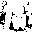

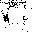

In [ ]:
img1 = cv2.imread("lake.jpg")
img1 = cv2.resize(img1,(32,32))
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2RGB)
img2 = cv2.imread("peppers.jpg")
img2 = cv2.resize(img2,(32,32))
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
img3 = cv2.imread("mandril.jpg")
img3 = cv2.resize(img3,(32,32))
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3,cv2.COLOR_GRAY2BGR)
ret1, thresh1 = cv2.threshold(img1,70,255,0)
gray1 = cv2.cvtColor(thresh1, cv2.COLOR_BGR2GRAY)
#gray1 = thresh1
conv_im_11 = conv_img_01(gray1)
ret2, thresh2 = cv2.threshold(img2,70,255,0)
gray2 = cv2.cvtColor(thresh2, cv2.COLOR_BGR2GRAY)
#gray2 = thresh2
conv_im_12 = conv_img_01(gray2)
ret3, thresh3 = cv2.threshold(img3,70,255,0)
gray3 = cv2.cvtColor(thresh3, cv2.COLOR_BGR2GRAY)
#gray3 = thresh3
conv_im_13 = conv_img_01(gray3)
cv2_imshow(thresh1)
cv2_imshow(thresh2)
cv2_imshow(thresh3)

This is an empty code cell.

# Convert the above intermediate superposition images to binary
This code block defines a function `conv_im_bin` that binarizes an image by setting pixel values greater than 0 to 255 and values equal to 0 to 0. It then applies this function to the converted images (`conv_im_11`, `conv_im_12`, `conv_im_13`) generated in the previous step and displays the binarized images.

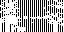

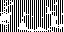

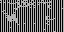

In [ ]:
### Superposition state
def conv_im_bin(conv_im):
  for i in range(0,len(conv_im)) :
    for j in range(0,len(conv_im[0])):
      if conv_im[i][j] >0:
        conv_im [i][j] = 255
      else:
        conv_im [i][j] = 0
  return conv_im
# conv_im_1 = conv_im_bin(conv_im)
# cv2_imshow(conv_im_1)
conv_im_11 = conv_im_bin(conv_im_11)
cv2_imshow(conv_im_11)
#cv2.imwrite(lake_sup.png, conv_im_11)
conv_im_12 = conv_im_bin(conv_im_12)
cv2_imshow(conv_im_12)
#cv2.imwrite(peper_sup.png, conv_im_12)
cv2_imshow(conv_im_13)
#cv2.imwrite(mandril-sup.png, conv_im_13)

This code block contains commented-out code for converting a grayscale image using `conv_img6` and displaying the result.

In [ ]:
#print(gray.shape)
#bw_rand= conv_img6(gray)
#cv2_imshow(bw_rand)

# Define function to perform multiple measurements and average out

This code block defines several functions (`convshots`, `convshots6`, `convshots7`) that apply image conversion functions (`conv1_rgb`, `conv_img6`, `conv7_rgb` respectively) multiple times (controlled by the `shots` parameter) and then average the results to produce a final converted image. This simulates a process involving multiple measurements or trials

## Convshots7 is for binary based measurement
## Convshots applies on RGB image
## Convshots6 applies on single channel image

In [ ]:
def convshots(img,shots=50):
    img_list=[]
    for i in range(shots):
        conv2 = conv1_rgb(img)
        img_list += [conv2]
    converted = np.zeros((256,256,3))
    sh = 0
    print(len(img),len(img[0]),len(img[0][0]))
    for i in range(0,len(img)):
         for j in range(0,len(img[0])):
             for k in range(0,len(img[0][0])):
                #val = {}
                val = 0
                for l in range(shots):
                    #print(i,j,k,l,img_list[l][i][j][k])
                    val += img_list[l][i][j][k]
                    '''
                    if img_list[l][i][j][k] in val:
                        val[img_list[l][i][j][k]]+=1
                    else:
                        val[img_list[l][i][j][k]]=1
                keys = list(val.keys())
                print(val)
                if(len(keys)>1):
                    if val[keys[0]]>val[keys[1]]:
                        converted[i][j][k] = keys[0]
                    else:
                        converted[i][j][k] = keys[1]
                else:
                    converted[i][j][k] = keys[0]
                    '''
                converted[i][j][k] = val/shots
                #print(sh)
                sh+=1
    return converted

def convshots6(img,shots=50):
    img_list=[]
    for i in range(shots):
        conv2 = conv_img6(img)
        img_list += [conv2]
    converted = np.zeros((256,256))
    sh = 0
    print(len(img),len(img[0]))
    for i in range(0,len(img)):
         for j in range(0,len(img[0])):
                #val = {}
                val = 0
                for l in range(shots):
                    #print(i,j,k,l,img_list[l][i][j][k])
                    val += img_list[l][i][j]
                    '''
                    if img_list[l][i][j][k] in val:
                        val[img_list[l][i][j][k]]+=1
                    else:
                        val[img_list[l][i][j][k]]=1
                keys = list(val.keys())
                print(val)
                if(len(keys)>1):
                    if val[keys[0]]>val[keys[1]]:
                        converted[i][j][k] = keys[0]
                    else:
                        converted[i][j][k] = keys[1]
                else:
                    converted[i][j][k] = keys[0]
                    '''
                converted[i][j] = val/shots
                #print(sh)
                sh+=1
    return converted


def convshots7(img,shots=1):
    img_list=[]
    for i in range(shots):
        conv2 = conv7_rgb(img)
        img_list += [conv2]
    converted = np.zeros((256,256,3))
    sh = 0
    print(len(img),len(img[0]))
    for i in range(0,len(img)):
         for j in range(0,len(img[0])):
           for k in range(0,len(img[0][0])):
                #val = {}
                val = 0
                for l in range(shots):
                    #print(i,j,k,l,img_list[l][i][j][k])
                    val += img_list[l][i][j][k]
                    '''
                    if img_list[l][i][j][k] in val:
                        val[img_list[l][i][j][k]]+=1
                    else:
                        val[img_list[l][i][j][k]]=1
                keys = list(val.keys())
                print(val)
                if(len(keys)>1):
                    if val[keys[0]]>val[keys[1]]:
                        converted[i][j][k] = keys[0]
                    else:
                        converted[i][j][k] = keys[1]
                else:
                    converted[i][j][k] = keys[0]
                    '''
                converted[i][j][k] = val/shots
                #print(sh)
                sh+=1
    return converted

## Redundant redefinition of convshots

This code block redefines the `convshots` function, likely to correct or modify the previous definition. This version also applies `conv1_rgb` multiple times and averages the results.

In [ ]:
def convshots(img,shots=1):
    img_list=[]
    for i in range(shots):
        conv2 = conv1_rgb(img)
        img_list += [conv2]
    converted = np.zeros((256,256,3))
    sh = 0
    print(len(img),len(img[0]),len(img[0][0]))
    for i in range(0,len(img)):
         for j in range(0,len(img[0])):
             for k in range(0,len(img[0][0])):
                #val = {}
                val = 0
                for l in range(shots):
                    #print(i,j,k,l,img_list[l][i][j][k])
                    val += img_list[l][i][j][k]
                    '''
                    if img_list[l][i][j][k] in val:
                        val[img_list[l][i][j][k]]+=1
                    else:
                        val[img_list[l][i][j][k]]=1
                keys = list(val.keys())
                print(val)
                if(len(keys)>1):
                    if val[keys[0]]>val[keys[1]]:
                        converted[i][j][k] = keys[0]
                    else:
                        converted[i][j][k] = keys[1]
                else:
                    converted[i][j][k] = keys[0]
                    '''
                converted[i][j][k] = val/shots
                #print(sh)
                sh+=1
    return converted

# Apply Convshots7
This code block loads the `lake.jpg` image, resizes it to 256x256, and then applies the `convshots7` function with the default number of shots (1) to it, storing the result in `n_img`.

In [ ]:
img1 = cv2.imread("lake.jpg")
img1 = cv2.resize(img1,(256,256))
n_img = convshots7(img1)

256 256


# View Image after 1shot measurement using convshot7
This code block displays the image stored in the `n_img` variable, which is the result of applying the `convshots7` function to the `lake.jpg` image.

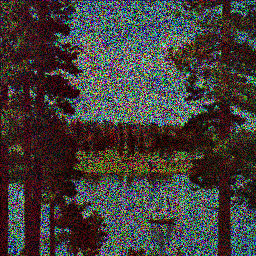

In [ ]:
cv2_imshow(n_img)

This code block contains commented-out code to apply the `convshots` function to the `n_img` and store the result in `n_n_img`.

In [ ]:
#n_n_img = convshots(n_img)

This code block contains commented-out code to display the image stored in the `n_n_img` variable.

In [ ]:
#cv2_imshow(n_n_img)

This code block contains commented-out code to print the pixel value at the first position (0,0) of the `n_n_img`.

In [ ]:
#print(n_n_img[0][0])

This code block lists all files in the current directory and prints their names.

In [ ]:
files = [f for f in os.listdir(".") if os.path.isfile(f)]
print(files)

['mandril.jpg', 'lake.jpg', 'peppers.jpg']


# Run convshots7 on all three images and get image analysis result
This code block iterates through the files in the current directory, loads each image, resizes it, and applies the `convshots7` function with a varying number of shots (1 and 10). It then displays the converted image, saves it to a file, and calculates various image quality metrics (MSE, RMSE, PSNR, SSIM, UQI, MSSSIM, ERGAS, SCC, RASE, SAM) by comparing the restored image with the original. These metrics and the filename are stored in a pandas DataFrame. The code block was interrupted during execution.

mandril.jpg
256 256


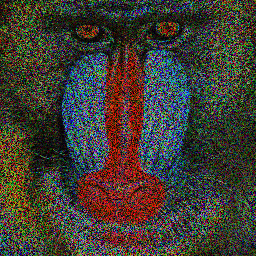

KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame()
for filey in files:
    print(filey)
    img = cv2.imread(filey)
    small = cv2.resize(img,(256,256))
    #for k in (1,100,1000):
    for k in (1,10):
        #small = cv2.cvtColor(small, cv2.COLOR_BGRA2GRAY)
        #small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)
        #plt.imsave(filey.split(".")[0]+"_real.jpg",small)
        # cv2.imwrite(filey.split(".")[0]+"_real.jpg",small)
        #real = cv2.imread(filey.split(".")[0]+"_real.jpg")
        real = small
        conv = convshots7(real,k)
        #conv = cv2.cvtColor(conv, cv2.COLOR_BGR2RGB)
        cv2_imshow(conv)
        #plt.imsave(filey.split(".")[0]+"_conv.jpg", conv)
        cv2.imwrite(filey.split(".")[0]+str(k)+"_conv_a.jpg",conv)
        restored = cv2.imread(filey.split(".")[0]+str(k)+"_conv_a.jpg")
        values = {
            "Name": filey,
            "MSE": np.round(mse(restored,real),3),
            "RMSE": np.round(rmse(restored, real),3),
            "PSNR": np.round(psnr(restored, real),3),
            "SSIM": (np.round(ssim(restored, real)[0],3),np.round(ssim(restored, real)[1],3)),
            "UQI": np.round(uqi(restored, real),3),
            "MSSSIM": np.round(msssim(restored, real).real,3),
            "ERGAS": np.round(ergas(restored, real),3),
            "SCC": np.round(scc(restored, real),3),
            "RASE": np.round(rase(restored, real),3),
            "SAM": np.round(sam(restored, real),3)
        }
        df = pd.concat([df,pd.DataFrame.from_dict([values])])

This code block displays the head of the DataFrame `df`, showing the first few rows of the collected image quality metrics.

In [ ]:
df.head()

This code block transposes the DataFrame `df`, swapping rows and columns.

In [ ]:
df = df.transpose()

This code block saves the transposed DataFrame `df` to a CSV file named 'Original-Restored Comparison.csv'.

In [ ]:
df.to_csv('Original-Restored Comparison.csv')

This code block reads the CSV file 'Original-Restored Comparison.csv' into a new pandas DataFrame named `df1`.

In [ ]:
df1 = pd.read_csv("Original-Restored Comparison.csv")

This code block displays the first 11 rows of the DataFrame `df1`.

In [ ]:
df1.head(11)

This code block loads an image named 'lena.png', displays it, applies the `conv_img` function to it, and then displays the converted image.

In [ ]:
img = cv2.imread('lena.png')
cv2_imshow(img)
conv = conv_img(img)
cv2_imshow(conv)

This is an empty code cell.

This code block defines a function `updatemode` which appears to be setting up and training a deep learning model using PyTorch for image classification. It includes steps for data loading, transformation, splitting into training, validation, and testing sets, defining a GoogLeNet model, training the model, and testing its performance. It also includes code for database interaction (sqlite3) and file handling (shutil, pickle, os, glob). The function is called within a `if __name__=="__main__":` block.

def updatemode():
    import sqlite3
    from sqlite3 import Connection
    import os
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    import cv2
    import matplotlib.pyplot as plt
    import glob
    from tqdm import tqdm
   
    import torch
    from torch import nn, optim
    import torch.nn.functional as F
    import torchvision
    from torchvision import datasets, transforms, models
    from torch.autograd import Variable
    from torch.utils.data.sampler import SubsetRandomSampler
    import shutil
    import pickle



    basedir = os.path.abspath(os.path.dirname(__file__))
    UPLOAD_FOLDER = os.path.join(basedir, "static", "tempdir")
    URI_SQLITE_DB = os.path.join(basedir, 'test.db')
    #Define the data directory
    data_dir = os.path.join(basedir, "static", "train")

    def folder_create(path):
        if os.path.exists(path):
            return True
        else:
            os.mkdir(path)
            return True


    folder_create(data_dir)

    def init_db(conn: Connection):
        conn.execute("""CREATE TABLE IF NOT EXISTS test(
                                id INTEGER PRIMARY KEY AUTOINCREMENT,
                                filepath TEXT NOT NULL UNIQUE,
                                predicted TEXT NOT NULL,
                                userinput TEXT NOT NULL,
                                user_id INTEGER,
                                validity INTEGER
                        );""")
        conn.execute("""CREATE TABLE IF NOT EXISTS userstable
                            (
                                id INTEGER PRIMARY KEY AUTOINCREMENT,
                                username TEXT NOT NULL UNIQUE,
                                password TEXT NOT NULL,
                                isadmin INTEGER NOT NULL DEFAULT 0
                            );
                        """)
        conn.commit()


    def get_connection(path: str):
        """Put the connection in cache to reuse if path does not change between Streamlit reruns.
        NB : https://stackoverflow.com/questions/48218065/programmingerror-sqlite-objects-created-in-a-thread-can-only-be-used-in-that-sa
        """
        return sqlite3.connect(path, check_same_thread=False)


    conn = get_connection(URI_SQLITE_DB)
    # init_db(conn)

    df = pd.read_sql_query("SELECT * FROM test", conn)
    file_data = df[['id', 'filepath','validity','userinput']]
    file_data = file_data[file_data['validity'] == 1]
    file_data['userinput'] = file_data['userinput'].str.replace(" ","-")

    for value in file_data.userinput.unique():
        path = os.path.join(basedir, "static", "train", value)
        folder_create(path)

    for index, row in file_data.iterrows():
        shutil.copyfile(os.path.join(basedir, "static", "tempdir", row["filepath"]), os.path.join(basedir, "static", "train", row["userinput"], row["filepath"]))

    # Define transforms for the training and validation sets
    data_transforms ={
        "train_transforms": transforms.Compose([transforms.RandomRotation(30),
                                            transforms.RandomResizedCrop(224),
                                            transforms.RandomHorizontalFlip(),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406],
                                                                    [0.229, 0.224, 0.225])]),
    "valid_transforms": transforms.Compose([transforms.Resize(225),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406],
                                                                    [0.229, 0.224, 0.225])]),
        "test_transforms": transforms.Compose([transforms.Resize(225),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406],
                                                                    [0.229, 0.224, 0.225])])
    }

    # Split the dataset into train, validation and test
    train_data = 0.8
    valid_data = 0.1
    test_data = 0.1

    # Load the datasets with ImageFolder
    train_data = datasets.ImageFolder(data_dir, transform=data_transforms["train_transforms"])#loading dataset
    valid_data = datasets.ImageFolder(data_dir, transform=data_transforms["valid_transforms"])
    test_data = datasets.ImageFolder(data_dir, transform=data_transforms["test_transforms"])

    # Obtain training indices that will be used for validation and test
    num_train = len(train_data)
    indices = list(range(num_train))
    # np.random.shuffle(indices)
    train_count = int(0.8*num_train)
    valid_count = int(0.1*num_train)
    test_count = num_train - train_count - valid_count
    train_idx = indices[:train_count]
    valid_idx = indices[train_count:train_count+valid_count]
    test_idx = indices[train_count+valid_count:]

    print(len(train_idx), len(valid_idx), len(test_idx))
    print("Training", train_count, np.sum(len(train_idx)/num_train))
    print("Validation", valid_count, np.sum(len(valid_idx)/num_train))
    print("Test", test_count, np.sum(len(test_idx)/num_train))

    # Define a custom sampler for the dataset loader avoiding recreating the dataset (just creating a new loader for each different sampling)
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)
    test_sampler = SubsetRandomSampler(test_idx)

    # Define the dataloaders using the image datasets. Dataloader is used to load our data in batches
    trainloader = torch.utils.data.DataLoader(train_data, batch_size = 64, shuffle = True)
    validloader = torch.utils.data.DataLoader(valid_data, batch_size = 32, sampler = valid_sampler)
    testloader = torch.utils.data.DataLoader(test_data, batch_size = 32, sampler = test_sampler)

    classes=[]
    for i, fname in enumerate(os.listdir(os.path.join(basedir, "static", "train"))):
        classes += [fname]
    classes=np.array(classes)

    with open(os.path.join(UPLOAD_FOLDER,'model','classlabels1.pkl'), 'wb') as fh:
        pickle.dump(classes, fh)


    def imshow(img):
        img = img / 2 + 0.5 #unnormalize
        plt.imshow(np.transpose(img, (1,2,0))) #convert tensor image type to numpy image type for visualization


    #Visualize some sample data
    #Obtain one batch of training images
    dataiter = iter(trainloader)
    images, labels = dataiter.__next__()
    images = images.numpy() #convert images to numpy for display

    #Plot the images in the batch, along with corresponding labels
    '''
    fig = plt.figure(figsize=(25,4))
    for idx in np.arange(20):
        ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
        imshow(images[idx])
        #ax.set_title(str(labels[idx].item()))
        ax.set_title(classes[labels[idx]])
    '''

    # Specify model architecture
    # Load the pretrained model from pytorch's library and stored it in model_transfer
    model_transfer = models.googlenet(pretrained=True)

    # Check if GPU is available
    use_cuda = torch.cuda.is_available()
    print(use_cuda)
    if use_cuda:
        model_transfer = model_transfer.cuda()

    #print the model to see all the layers
    print(model_transfer)


    #Lets read the fully connected layer
    print(model_transfer.fc.in_features)
    print(model_transfer.fc.out_features)


    for param in model_transfer.parameters():
        param.requires_grad=True


    # Define n_inputs takes the same number of inputs from pre-trained model
    n_inputs = model_transfer.fc.in_features #refer to the fully connected layer only

    # Add last linear layer (n_inputs -> n classes). In this case the ouput is 4 classes
    # New layer automatically has requires_grad = True
    last_layer = nn.Linear(n_inputs, len(classes))

    model_transfer.fc = last_layer

    # If GPU is available, move the model to GPU
    if use_cuda:
        model_transfer = model_transfer.cuda()
    
    # Check to see the last layer produces the expected number of outputs
    print(model_transfer.fc.out_features)


    # Specify loss function and optimizer
    criterion_transfer = nn.CrossEntropyLoss()
    optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001, momentum=0.9)

    # Train the model
    def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
        '''returns trained model'''
        # Initialize tracker for minimum validation loss
        valid_loss_min = np.inf
    
        for epoch in range(1, n_epochs+1):
            # In the training loop, I track down the loss
            # Initialize variables to monitor training and validation loss
            train_loss = 0.0
            valid_loss = 0.0
        
            # Model training
            model.train()
            for batch_idx, (data,target) in enumerate(trainloader):
                # 1st step: Move to GPU
                if use_cuda:
                    data,target = data.cuda(), target.cuda()
        
                # Then, clear (zero out) the gradient of all optimized variables
                optimizer.zero_grad()
                # Forward pass: compute predicted outputs by passing inputs to the model
                output = model(data)
                # Perform the Cross Entropy Loss. Calculate the batch loss.
                loss = criterion(output, target)
                # Backward pass: compute gradient of the loss with respect to model parameters
                loss.backward()
                # Perform optimization step (parameter update)
                optimizer.step()
                # Record the average training loss
                train_loss = train_loss + ((1/ (batch_idx + 1 ))*(loss.data-train_loss))
        
            # Model validation
            model.eval()
            for batch_idx, (data,target) in enumerate(validloader):
                # Move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                # Update the average validation loss
                # Forward pass: compute predicted outputs by passing inputs to the model
                output = model(data)
                # Calculate the batch loss
                loss = criterion(output, target)
                # Update the average validation loss
                valid_loss = valid_loss + ((1/ (batch_idx +1)) * (loss.data - valid_loss))
        
            # print training/validation stats
            print('Epoch: {} \tTraining Loss: {:.5f} \tValidation Loss: {:.5f}'.format(
                epoch,
                train_loss,
                valid_loss))
        
            # Save the model if validation loss has decreased
            if valid_loss <= valid_loss_min:
                print('Validation loss decreased ({:.5f} --> {:.5f}). Saving model ...'.format(
                    valid_loss_min,
                    valid_loss))
                torch.save(model.state_dict(), os.path.join(UPLOAD_FOLDER,'model','model_transfer.pt'))
                valid_loss_min = valid_loss
    
        # Return trained model
        return model

    # Define loaders transfer
    loaders_transfer = {'train': trainloader,
                        'valid': validloader,
                        'test': testloader}

    # Train the model
    model_transfer = train(50, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, os.path.join(UPLOAD_FOLDER,'model','model_transfer.pt'))


    # Load the model that got the best validation accuracy
    model_transfer.load_state_dict(torch.load(os.path.join(UPLOAD_FOLDER,'model','model_transfer.pt')))


    def test(loaders, model, criterion, use_cuda):

        # monitor test loss and accuracy
        test_loss = 0.
        correct = 0.
        total = 0.

        model_transfer.eval() #set model into evaluation/testing mode. It turns of drop off layer
        #Iterating over test data
        for batch_idx, (data, target) in enumerate(loaders['test']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update average test loss
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)
                
        print('Test Loss: {:.6f}\n'.format(test_loss))

        print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
            100. * correct / total, correct, total))

    # call test function    
    test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)


    #Obtain one batch of test images
    dataiter = iter(testloader)
    images, labels = dataiter.__next__()
    images.numpy

    #Move model inputs to cuda, if GPU available
    if use_cuda:
        images = images.cuda()
        
    #Get sample outputs
    output= model_transfer(images)

    #Convert output probabilities to predicted class
    _,preds_tensor = torch.max(output,1)
    preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

    print(model_transfer.state_dict())
    #Plot the images in the batch, along with predicted and true labels
    '''
    fig = plt.figure(figsize=(30,4))
    for idx in np.arange(20):
        ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
        plt.imshow(np.transpose(images.cpu()[idx], (1,2,0)))
        ax.set_title("{} ({})".format(classes[preds[idx]],classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    '''


if __name__=="__main__":
    updatemode()

